<a href="https://colab.research.google.com/github/shabahmd/Machine-Learning-Notebooks/blob/main/Glove_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim matplotlib nltk


In [2]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize

sentences = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
tokenized_sentences = [[word.lower() for word in sentence] for sentence in sentences]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [6]:
from gensim.models import Word2Vec

word2vec_model = Word2Vec(sentences =  tokenized_sentences, vector_size =100, window = 5, min_count =2, workers =4)

word2vec_model.save('word2vec.model')

word2vec_model = Word2Vec.load('word2vec.model')

Visualize Word Embeddings

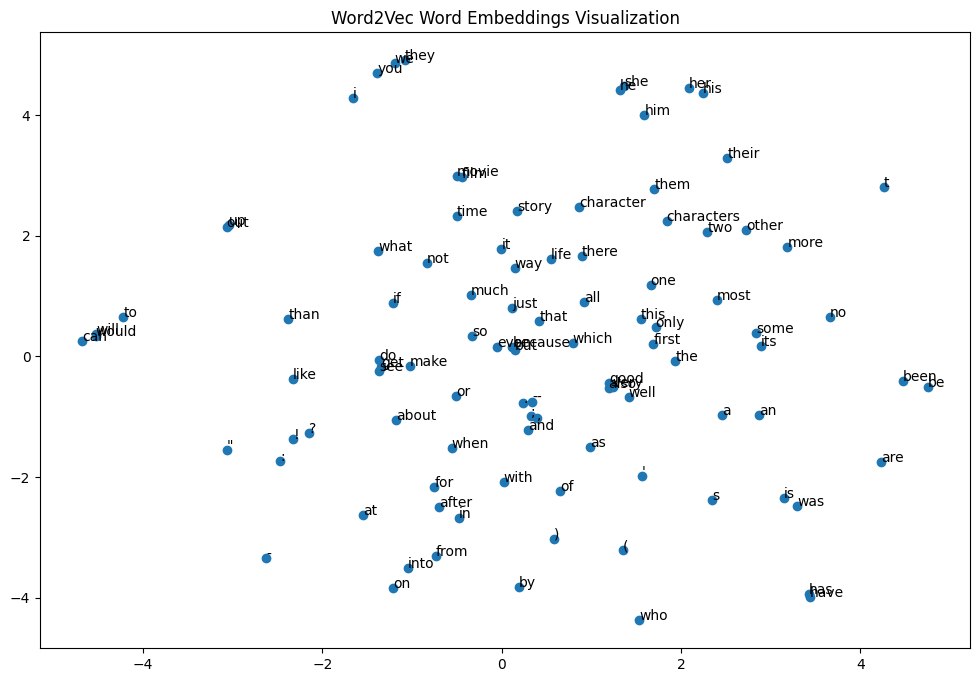

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = list(word2vec_model.wv.index_to_key)[:100]
word_vectors = word2vec_model.wv[words]

tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title("Word2Vec Word Embeddings Visualization")
plt.show()


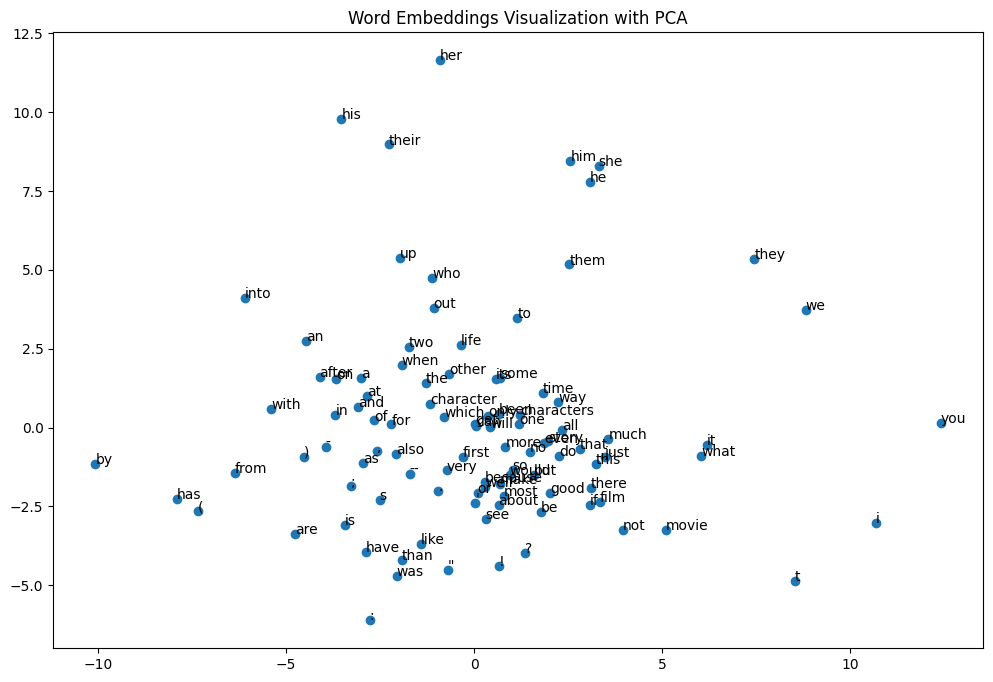

In [10]:
# Example: Visualizing embeddings using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
word_vectors_2d_pca = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d_pca[:, 0], word_vectors_2d_pca[:, 1], marker='o')
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d_pca[i, 0], word_vectors_2d_pca[i, 1]))
plt.title("Word Embeddings Visualization with PCA")
plt.show()
